<a href="https://colab.research.google.com/github/avimistry-3/Assign02/blob/main/COMP8730_Assign02_mistry43.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pytrec_eval
import pytrec_eval

import nltk
from nltk.corpus import brown
from nltk.util import ngrams 
from nltk import bigrams, trigrams

nltk.download('brown')

from collections import Counter, defaultdict
import re

import collections
from nltk import word_tokenize

from operator import itemgetter
import matplotlib.pyplot as plt

  Created wheel for pytrec-eval: filename=pytrec_eval-0.5-cp37-cp37m-linux_x86_64.whl size=266608 sha256=6318bf5e3a7173d97b1b53d9b940301faf482604b313f0c2f80183cf9b7009f0
  Stored in directory: /root/.cache/pip/wheels/42/96/77/0829b8b2606f90f61ba10a51277629d2b615604e122ee932f4
Successfully built pytrec-eval
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [15]:
news_words=brown.words(categories=["news"])

model = defaultdict(lambda: defaultdict(lambda: 0))

# Count frequency of co-occurance  
for sentence in brown.sents():
    for w1, w2, w3 in trigrams(sentence, pad_right=True, pad_left=True):
        model[(w1, w2)][w3] += 1

#normalizinging the frequency of co-occurence 
for w1_w2 in model:
    total_count = float(sum(model[w1_w2].values()))
    for w3 in model[w1_w2]:
        model[w1_w2][w3] /= total_count

print(dict(model["When","I"]))

{'come': 0.025, 'drove': 0.025, 'had': 0.025, 'wheeled': 0.025, 'was': 0.075, 'hold': 0.025, 'came': 0.075, 'looked': 0.025, 'pressed': 0.025, 'interviewed': 0.025, 'question': 0.025, 'mentioned': 0.025, 'try': 0.025, 'take': 0.025, 'speak': 0.025, 'returned': 0.025, 'stand': 0.025, 'informed': 0.025, 'first': 0.025, 'have': 0.025, 'speculated': 0.025, 'talked': 0.025, 'think': 0.025, 'answered': 0.025, 'switched': 0.025, 'say': 0.025, 'asked': 0.05, 'told': 0.025, 'went': 0.05, 'fell': 0.025, 'show': 0.025, 'did': 0.025, 'arrived': 0.025, 'get': 0.025}


In [14]:
FPATH = '/content/sample_data/data.txt'

with open(FPATH, mode='r', encoding='utf8') as fp:
      flines = fp.readlines()

Sentence_List = [i.split("*") for i in flines]
Sentence_List = [i[0].split() for i in Sentence_List]

sublist = [i[2:4] for i in Sentence_List]
Correct_words = [i[1] for i in Sentence_List]




In [5]:
ngram_list = []
for i in ([1,2,3,5,10]):
    ng = ngrams(brown.words(),i)
    ngram_list.append(ng)

In [16]:
model1 = defaultdict(lambda: defaultdict(lambda: 0))

for sentence in brown.sents():
    for w1 in ngrams(model1 ,1, pad_right=True, pad_left=True):
        model1[(w1, w2)][w3] += 1
        
for w1_w2 in model1:
    total_count = float(sum(model1[w1_w2].values()))
    for w3 in model1[w1_w2]:
        model1[w1_w2][w3] /= total_count


In [23]:

model2 = defaultdict(lambda: defaultdict(lambda: 0))

for sentence in brown.sents():
    for w1, w2 in bigrams(sentence, pad_right=True, pad_left=True):
        model2[(w1)][w3] += 1
        
for w1_w2 in model2:
    total_count = float(sum(model2[w1_w2].values()))
    for w3 in model2[w1_w2]:
        model2[w1_w2][w3] /= total_count


In [17]:
model3 = defaultdict(lambda: defaultdict(lambda: 0))

# Count frequency of co-occurance  
for sentence in brown.sents():
    for w1, w2, w3 in trigrams(sentence, pad_right=True, pad_left=True):
        model3[(w1, w2)][w3] += 1
        
for w1_w2 in model3:
    total_count = float(sum(model3[w1_w2].values()))
    for w3 in model3[w1_w2]:
        model3[w1_w2][w3] /= total_count

In [18]:
model5 = defaultdict(lambda: defaultdict(lambda: 0))

for sentence in brown.sents():
    for w1, w2, w3, w4,w5 in ngrams(sentence, 5, pad_right=True, pad_left=True):
        model5[(w1,w2, w3, w4)][w5] += 1
        
for w1_w2 in model5:
    total_count = float(sum(model5[w1_w2].values()))
    for w3 in model5[w1_w2]:
        model5[w1_w2][w3] /= total_count

In [19]:
model10 = defaultdict(lambda: defaultdict(lambda: 0))

for sentence in brown.sents():
    for w1, w2, w3, w4,w5, w6, w7, w8,w9, w10 in ngrams(sentence, 10, pad_right=True, pad_left=True):
        model10[(w1,w2, w3, w4,w5, w6, w7, w8,w9,)][w10] += 1
        
for w1_w2 in model10:
    total_count = float(sum(model10[w1_w2].values()))
    for w10 in model10[w1_w2]:
        model10[w1_w2][w10] /= total_count

In [20]:
def func1(sentences, model):
    Dictionary_items = []
    for sentence in sentences:
        l = []
        dicti = {}
        text = sentence
        text_length_initial = len(text)
        res = dict(sorted(model[tuple(text[-text_length_initial:])].items(), key = itemgetter(1), reverse = True)[:10])
        Alist = [x for x in res.keys()]
        Dictionary_items.append(Alist) 
    return(Dictionary_items)

In [24]:
predicted_models = []
models = [model1, model2, model3, model5, model10]
for model in models:
    predicted_models.append(func1(sublist, model))

len(predicted_models[0])

198

In [25]:
def skMeasure(rigth_word, predicted_words, k=[1, 5, 10]):
    count = []
    for i in range(198):
        candidate_word = predicted_words[i]
        right_word = rigth_word[i]
        for j in k:
            if right_word in candidate_word[:j]:
                count.append(1)
            else:
                count.append(0)
                pass
    return(sum(count) / len(count))


In [30]:
k1_means_models = []
for i in range(5):
    k1_means_models.append(skMeasure(Correct_words, predicted_models[i],k=[1]))
print(k1_means_models)

[0.0, 0.0, 0.015151515151515152, 0.0, 0.0]


In [33]:
k5_means_models = []
for i in range(5):
    k5_means_models.append(skMeasure(Correct_words, predicted_models[i],k=[5]))
print(k5_means_models)

[0.0, 0.0, 0.015151515151515152, 0.0, 0.0]


In [32]:
k10_means_models = []
for i in range(5):
    k10_means_models.append(skMeasure(Correct_words, predicted_models[i],k=[10]))
print(k10_means_models)

[0.0, 0.0, 0.020202020202020204, 0.0, 0.0]


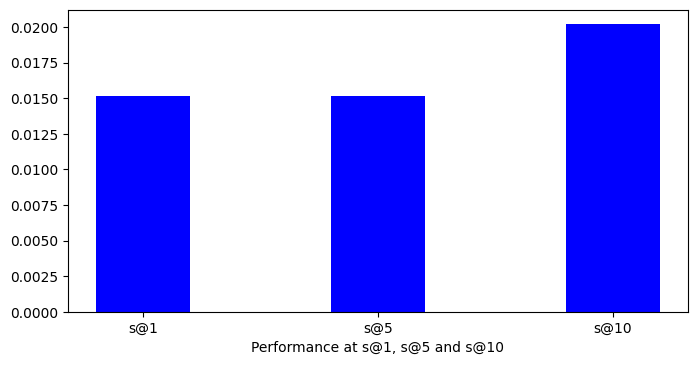

In [40]:
plt.rcParams.update({'figure.figsize':(8,4), 'figure.dpi':100})

words = ["s@1", "s@5", "s@10"]
avg = [0.015151515151515, 0.015151515151515 ,0.020202020202020]

plt.bar(words, avg, color ='blue',
        width = 0.4)

plt.xlabel("Performance at s@1, s@5 and s@10")
plt.show()